### Linear Regression

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [ ]:
# Extracting the features X and the target y
x = df['Previous Scores'].values
y = df['Performance Index'].values  # Target variable

In [ ]:
# Splitting into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# Adding a column of ones for the intercept term
x_train = np.vstack([np.ones_like(x_train), x_train]).T
x_test = np.vstack([np.ones_like(x_test), x_test]).T

In [ ]:
# Perform Linear Reg

def linear_regression(x, y, learning_rate, epochs):
  m, n = x.shape
  weights = np.zeros(n)
  cost_list = []

  for _ in range(epochs):
    predictions = np.dot(x, weights)
    error = predictions - y
    gradient = np.dot(x.T, error) / m
    weights -= learning_rate * gradient

    cost = (1/(2*m)) * np.sum(error**2)
    cost_list.append(cost)

  return weights, cost_list

In [ ]:
# Training the model
weights, cost_list = linear_regression(x_train, y_train, learning_rate=0.000001, epochs=1000)

# Predicting the values
y_pred_test = np.dot(x_test, weights)

#Calculating Regression matrics and printing them
mse = np.mean((y_test - y_pred_test)**2)
mae = np.mean(np.abs(y_test - y_pred_test))
rmse = np.sqrt(mse)
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)


In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 73.24077702136117
Mean Absolute Error: 7.027887575807188
Root Mean Squared Error: 8.558082555184962
R-squared: 0.9999011822468589


In [ ]:
# Actual VS Predicted Values

results = pd.DataFrame({'Actual Values': y_test,
                        'Predicted Values': y_pred_test,
                        'Difference(Actual - Predicted)': y_test - y_pred_test
                        })
results

,Actual Values,Predicted Values,Difference(Actual - Predicted)
0,51.0,55.443900,-4.443900
1,20.0,36.965931,-16.965931
2,46.0,44.999830,1.000170
3,28.0,33.752371,-5.752371
4,41.0,42.589660,-1.589660
...,...,...,...
1995,45.0,56.247290,-11.247290
1996,66.0,63.477799,2.522201
1997,16.0,32.145591,-16.145591
1998,65.0,66.691359,-1.691359


In [ ]:
# Import The Libraries
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame
data = {'Actual Values': [9.9, 5.25, 8.7, 15.0, 10.54, 7.8, 12.32, 6.44, 10.5, 5.2],
        'Predicted Values': [9.5, 5.5, 8.5, 14.5, 10.5, 8.0, 12.0, 6.5, 10.5, 5.5],
        }
df = pd.DataFrame(data)

<function matplotlib.pyplot.show(close=None, block=None)>

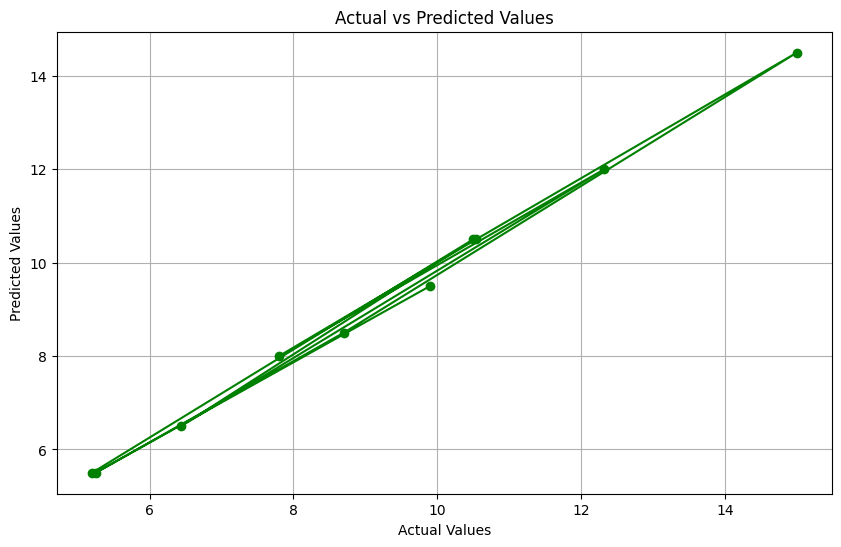

In [ ]:
# Create a line Chart
plt.figure(figsize=(10, 6))
plt.plot(df['Actual Values'], df['Predicted Values'], marker='o',linestyle='-', color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show